In [3]:
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

import seaborn as sns
import matplotlib.pyplot as plt


In [29]:
hand_df = pd.read_csv("data/sensorFile.csv", na_values=['?'])

#hand_df = hand_df._get_numeric_data()

hand_df = hand_df.fillna(0)
hand_df = hand_df.drop([0])
hand_df = hand_df.drop(['GyroX','GyroY','GyroZ'], axis = 1)

y = hand_df['Gesture']
X = hand_df.drop(['Gesture'], axis = 1)

print(X)

      Thumb  Index  Middle   Ring  Pinky
1     14326  28217   36235  31276  32500
2     14326  28161   36160  31307  32500
3     14414  28133   36160  31276  32467
4     14458  28161   36085  31244  32369
5     14518  28105   36085  31213  32369
...     ...    ...     ...    ...    ...
2115  14503  21187   30869  25390  10605
2116  14577  21187   30900  25316  10605
2117  14577  21167   30900  25390  10594
2118  14621  21146   30869  25390  10594
2119  14621  21167   30900  25316  10594

[2119 rows x 5 columns]


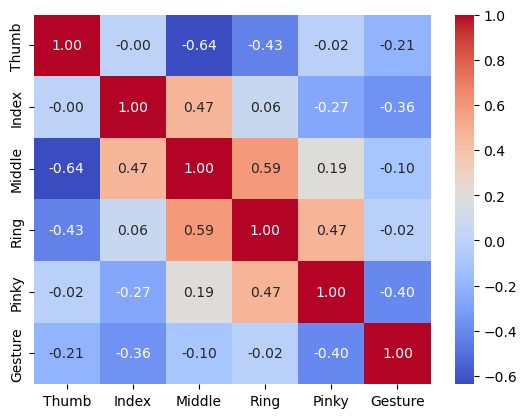

Standardized X:
[[-0.34552629  1.76111483  1.46139941  1.09319319  1.64040472]
 [-0.34552629  1.75270972  1.4542934   1.09712902  1.64040472]
 [-0.31222787  1.74850717  1.4542934   1.09319319  1.63592825]
 ...
 [-0.25055011  0.70297127  0.95592491  0.34589213 -1.33115362]
 [-0.2339009   0.69981935  0.95298776  0.34589213 -1.33115362]
 [-0.2339009   0.70297127  0.95592491  0.3364969  -1.33115362]]


In [31]:
# data preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#Standarization
min_max_scaler = MinMaxScaler()
X_min_max_scaled = min_max_scaler.fit_transform(X)
standard_scaler = StandardScaler()
X_standardized = standard_scaler.fit_transform(X)

#Check for feature dependency
correlation_matrix = hand_df.corr()

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

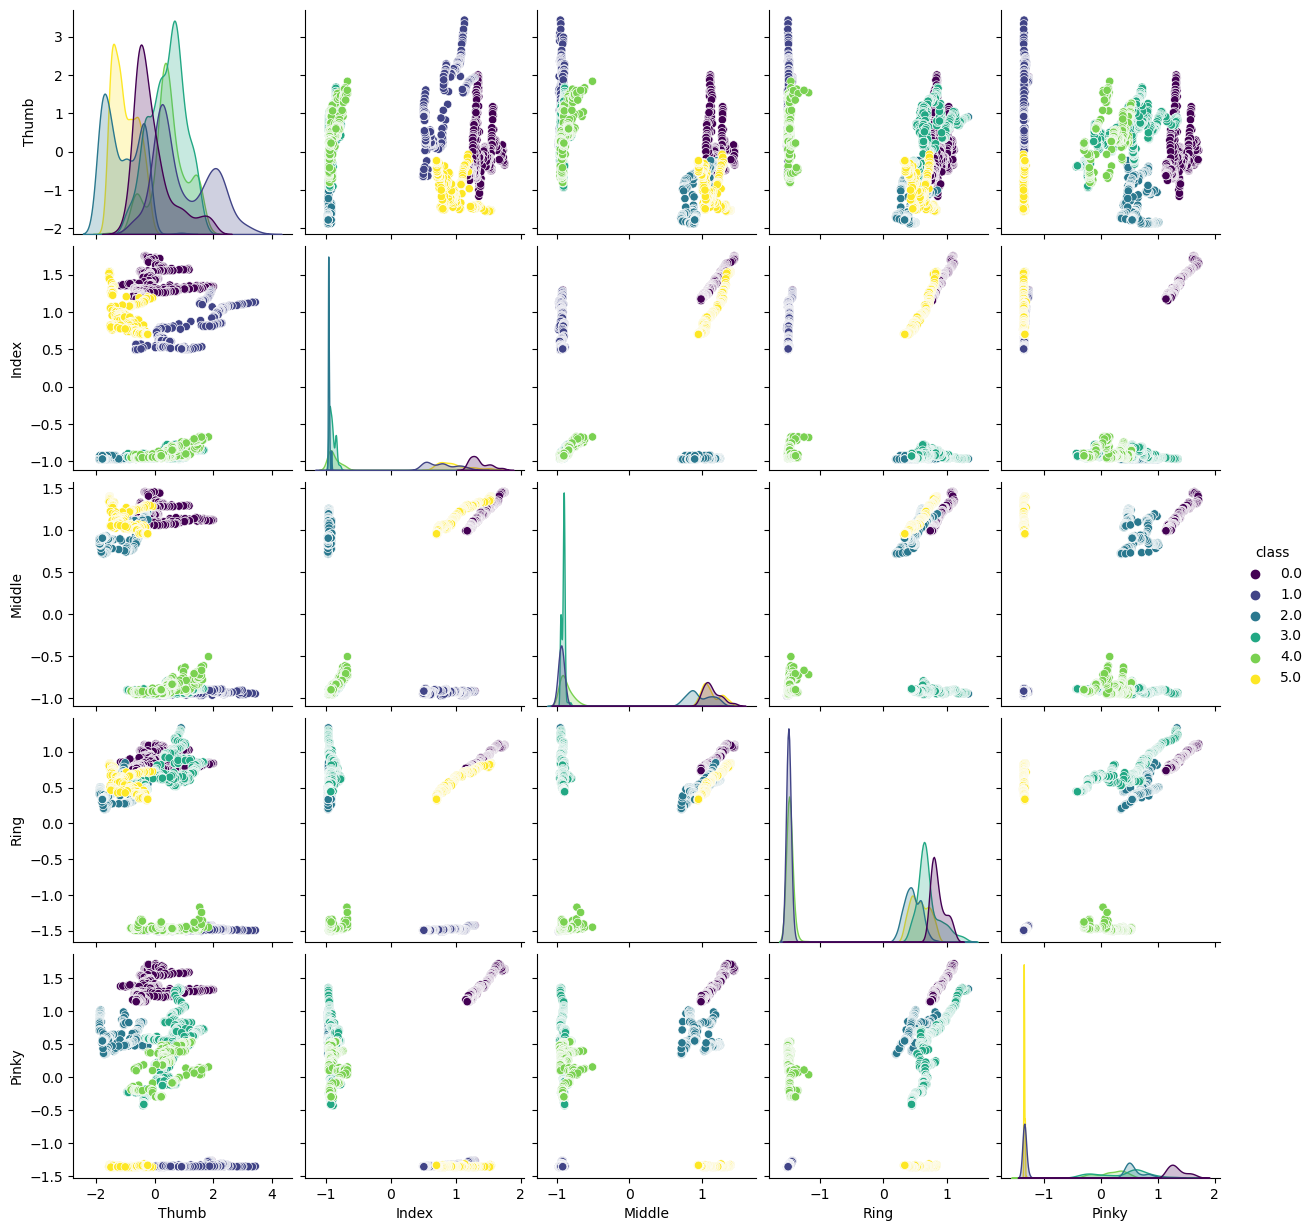

In [60]:
# Check for datapoint similarity

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Create a DataFrame with standardized features
data_standardized = pd.DataFrame(X_standardized, columns=['Thumb', 'Index', 'Middle', 'Ring', 'Pinky'])
data_standardized['class'] = y

sns.pairplot(data_standardized, hue='class', palette='viridis')
plt.show()

In [6]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

train_size = 0.75

# Spliting data

np.random.seed(0)

X_train, X_rem, y_train, y_rem = train_test_split(X_standardized,y, train_size=train_size,random_state = 0)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5,random_state = 0)

highest_valid = 0
accuracy_array = []

for k in range (1, 33+1, 2): 
    KNN_Model = KNeighborsClassifier(n_neighbors=k)
    KNN_Model.fit(X_train, y_train)

    y_predict_train = KNN_Model.predict(X_train)
    y_predict_valid = KNN_Model.predict(X_valid)
    y_predict_test = KNN_Model.predict(X_test)


    acc_train = accuracy_score(y_train, y_predict_train)
    acc_valid = accuracy_score(y_valid, y_predict_valid)
    acc_test = accuracy_score(y_test, y_predict_test)
    
    print('\n',k, '\t', acc_train, '\t', acc_valid, '\t', acc_test)

    if acc_valid > highest_valid:
        highest_valid = acc_valid
    
    accuracy_array.append([k, acc_valid])


for j in accuracy_array:
    if j[1] == highest_valid:
        print("\nbest k: ", j[0], "\thigest validation accuracy: ", j[1])
        
    



 1 	 1.0 	 1.0 	 1.0

 3 	 1.0 	 1.0 	 1.0

 5 	 1.0 	 1.0 	 1.0

 7 	 1.0 	 1.0 	 1.0

 9 	 1.0 	 1.0 	 1.0

 11 	 1.0 	 1.0 	 1.0

 13 	 1.0 	 1.0 	 1.0

 15 	 1.0 	 1.0 	 1.0

 17 	 1.0 	 1.0 	 1.0

 19 	 1.0 	 1.0 	 1.0

 21 	 1.0 	 1.0 	 1.0

 23 	 1.0 	 1.0 	 1.0

 25 	 1.0 	 1.0 	 1.0

 27 	 1.0 	 1.0 	 1.0

 29 	 1.0 	 1.0 	 1.0

 31 	 1.0 	 1.0 	 1.0

 33 	 1.0 	 1.0 	 1.0

best k:  1 	higest validation accuracy:  1.0

best k:  3 	higest validation accuracy:  1.0

best k:  5 	higest validation accuracy:  1.0

best k:  7 	higest validation accuracy:  1.0

best k:  9 	higest validation accuracy:  1.0

best k:  11 	higest validation accuracy:  1.0

best k:  13 	higest validation accuracy:  1.0

best k:  15 	higest validation accuracy:  1.0

best k:  17 	higest validation accuracy:  1.0

best k:  19 	higest validation accuracy:  1.0

best k:  21 	higest validation accuracy:  1.0

best k:  23 	higest validation accuracy:  1.0

best k:  25 	higest validation accuracy:  1.0

best k:

3 	 6


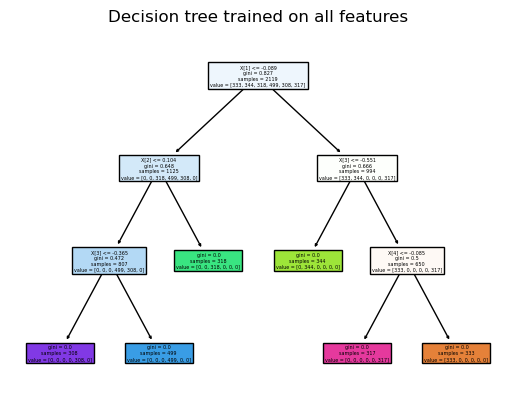

In [7]:
#Decision Tree

dts = DecisionTreeClassifier(random_state = 0)

dts.fit(X_standardized, y)

max_depth = dts.get_depth()
max_leaves = dts.get_n_leaves()

print (max_depth, '\t', max_leaves)
plt.figure()
plot_tree(dts, filled=True)
plt.title("Decision tree trained on all features")
plt.show()

In [8]:
np.random.seed(0)
# keep some data out for testing train/test 75/25
X_train, X_test, y_train, y_test = train_test_split(X_standardized,y, train_size=0.75,random_state = 0)

best_cvs=0
best_d=0

for d in range (1, max_depth+1): 
    dts = DecisionTreeClassifier(max_depth = d, random_state = 0)
    dts.fit(X_train, y_train)
    print("\nd: ", d)
    cvs = cross_val_score(dts, X_train, y_train, cv=10)
    print("Mean Cross-Validation Accuracy:", np.mean(cvs))
    test_score = dts.score(X_test, y_test)
    print("Test Set Accuracy:", test_score)
    if best_cvs<np.mean(cvs):
        best_cvs=np.mean(cvs)
        best_d=d
 
print('\n\nnbest d', '\t', 'higest cross validation score\n')
print(best_d, '\t', best_cvs, '\n')


d:  1
Mean Cross-Validation Accuracy: 0.3958482604888146
Test Set Accuracy: 0.4037735849056604

d:  2
Mean Cross-Validation Accuracy: 0.7067351325531407
Test Set Accuracy: 0.7

d:  3
Mean Cross-Validation Accuracy: 1.0
Test Set Accuracy: 1.0


nbest d 	 higest cross validation score

3 	 1.0 



In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_standardized,y, train_size=0.75,random_state = 0)
svm = SVC(kernel='linear') 
svm.fit(X_train, y_train)

cvs = cross_val_score(clf, X_standardized, y, cv = 10)

print("default SVC cvs:",cvs)

default SVC cvs: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [72]:
#svm hyper-paramerter tunning

from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 100],      # Regularization parameter
    'kernel': ['linear', 'rbf'], # Kernel type
    'gamma': ['scale', 'auto'],  # Kernel coefficient
}

grid_search = GridSearchCV(svm, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the results as a DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Print all parameters and corresponding mean test scores
for index, row in results_df.iterrows():
    params = row['params']
    mean_test_score = row['mean_test_score']
    
    print("Parameters:", params)
    print("Mean Test Score:", mean_test_score)
    
# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


# Pred with best params
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test)

# Evaluate the performance on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", test_accuracy)


Parameters: {'C': 0.001, 'gamma': 'scale', 'kernel': 'linear'}
Mean Test Score: 1.0
Parameters: {'C': 0.001, 'gamma': 'scale', 'kernel': 'rbf'}
Mean Test Score: 0.23536740705357856
Parameters: {'C': 0.001, 'gamma': 'auto', 'kernel': 'linear'}
Mean Test Score: 1.0
Parameters: {'C': 0.001, 'gamma': 'auto', 'kernel': 'rbf'}
Mean Test Score: 0.23536740705357856
Parameters: {'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
Mean Test Score: 1.0
Parameters: {'C': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}
Mean Test Score: 1.0
Parameters: {'C': 0.01, 'gamma': 'auto', 'kernel': 'linear'}
Mean Test Score: 1.0
Parameters: {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf'}
Mean Test Score: 0.23536740705357856
Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Mean Test Score: 1.0
Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Mean Test Score: 1.0
Parameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}
Mean Test Score: 1.0
Parameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
M

In [71]:
#One versus Rest
from sklearn.multiclass import OneVsRestClassifier

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75,random_state = 0)

# Define the base classifier
base_classifier = SVC()

# Define the OneVsRestClassifier
clf = OneVsRestClassifier(base_classifier)

# Define the parameter grid to search
param_grid = {
    'estimator__C': [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 100],  # Adjust the range based on your needs
    'estimator__kernel': ['linear', 'rbf'],  # You can try other kernels as well
}

# Create the grid search object
grid_search = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the results as a DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Print all parameters and corresponding mean test scores
for index, row in results_df.iterrows():
    params = row['params']
    mean_test_score = row['mean_test_score']
    
    print("Parameters:", params)
    print("Mean Test Score:", mean_test_score)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
test_score = best_model.score(X_test, y_test)
print("Test Set Accuracy:", test_score)

Parameters: {'estimator__C': 0.001, 'estimator__kernel': 'linear'}
Mean Test Score: 1.0
Parameters: {'estimator__C': 0.001, 'estimator__kernel': 'rbf'}
Mean Test Score: 1.0
Parameters: {'estimator__C': 0.01, 'estimator__kernel': 'linear'}
Mean Test Score: 1.0
Parameters: {'estimator__C': 0.01, 'estimator__kernel': 'rbf'}
Mean Test Score: 1.0
Parameters: {'estimator__C': 0.1, 'estimator__kernel': 'linear'}
Mean Test Score: 1.0
Parameters: {'estimator__C': 0.1, 'estimator__kernel': 'rbf'}
Mean Test Score: 1.0
Parameters: {'estimator__C': 0.5, 'estimator__kernel': 'linear'}
Mean Test Score: 1.0
Parameters: {'estimator__C': 0.5, 'estimator__kernel': 'rbf'}
Mean Test Score: 1.0
Parameters: {'estimator__C': 1, 'estimator__kernel': 'linear'}
Mean Test Score: 1.0
Parameters: {'estimator__C': 1, 'estimator__kernel': 'rbf'}
Mean Test Score: 1.0
Parameters: {'estimator__C': 5, 'estimator__kernel': 'linear'}
Mean Test Score: 1.0
Parameters: {'estimator__C': 5, 'estimator__kernel': 'rbf'}
Mean Test